### K-NN 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("./datas/Social_Network_Ads.csv")
print(df.head(15))
X = df.iloc[ : , : -1 ].values
y = df.iloc[: , -1].values
print(type(X))
print(type(y))

    Age  EstimatedSalary  Purchased
0    19            19000          0
1    35            20000          0
2    26            43000          0
3    27            57000          0
4    19            76000          0
5    27            58000          0
6    27            84000          0
7    32           150000          1
8    25            33000          0
9    35            65000          0
10   26            80000          0
11   26            52000          0
12   20            86000          0
13   32            18000          0
14   18            82000          0
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=42 )

### standardization
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)
print(classification_report(y_test , y_pred))
print("Confusion matrix:\n" , 
      confusion_matrix(y_test , y_pred))

0.925
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.86      0.92      0.89        13

    accuracy                           0.93        40
   macro avg       0.91      0.92      0.92        40
weighted avg       0.93      0.93      0.93        40

Confusion matrix:
 [[25  2]
 [ 1 12]]


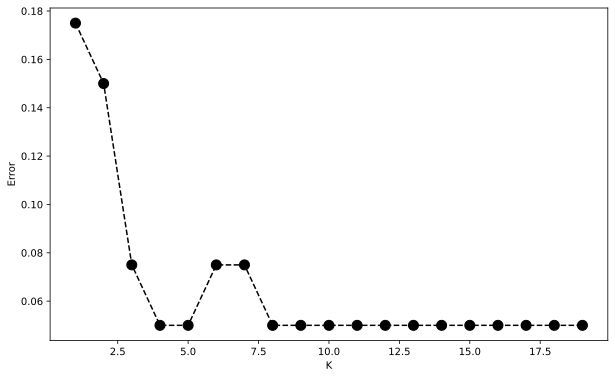

In [8]:
errors = []
ks = range(1, 20)

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k , metric="manhattan")
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    errors.append(1 - accuracy_score(y_test , y_pred))

set_matplotlib_formats("svg")
plt.figure(figsize=(10 , 6))
plt.plot(ks , errors , linestyle="dashed" , marker="o" , markersize=10 , color="black")

plt.xlabel("K")
plt.ylabel("Error")

plt.show()